# **MÓDULO 18 - Pratique**
# Regressão Linear

Agora que aprendemos como aplicar a regressão linear simples e múltipla, colocaremos em prática os conceitos vistos na aula.

Temos aqui uma base de imóveis para alugar, precisamos desenvolver um modelo de regressão linear múltipla para conseguir prever o preço de imóveis dadas as variáveis independentes do nosso modelo.

**Atenção! Esse é seu primeiro modelo, caso tenha dificuldade conte com a ajuda da tutoria**

Você notará que alguns códigos já estão presentes para facilitar a construção de vocês.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats
from imblearn.over_sampling import SMOTE


In [2]:
df = pd.read_csv("ALUGUEL_MOD12.csv", delimiter=';')

df.head(10)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0
5,500,380,66,2,1,0,1
6,550,100,48,2,2,1,1
7,600,110,46,2,2,1,1
8,600,100,49,2,2,1,1
9,600,325,50,2,2,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7203 entries, 0 to 7202
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Valor_Aluguel     7203 non-null   int64
 1   Valor_Condominio  7203 non-null   int64
 2   Metragem          7203 non-null   int64
 3   N_Quartos         7203 non-null   int64
 4   N_banheiros       7203 non-null   int64
 5   N_Suites          7203 non-null   int64
 6   N_Vagas           7203 non-null   int64
dtypes: int64(7)
memory usage: 394.0 KB


Legenda dos dados:

*   **Valor_Aluguel** : valor Total pago no aluguel

*   **Valor_Condominio** : Valor do Condomínio.

*   **Metragem** : Metragem do Apartamento.

*   **N_Quartos** : Número de Quartos do Imóvel.

*   **N_banheiros** : Número de banheiros.

*   **N_Suites** : Número de Suítes.

*   **N_Vagas** : Número de Vagas.

# 1 - Realize a primeira etapa de pré processamento dos dados.

A) Verifique os tipos de dados.


B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

In [4]:
#verificar tipo de dados
df.dtypes

Valor_Aluguel       int64
Valor_Condominio    int64
Metragem            int64
N_Quartos           int64
N_banheiros         int64
N_Suites            int64
N_Vagas             int64
dtype: object

os tipos dos dados estão corretos

In [5]:
df.isnull().sum()

Valor_Aluguel       0
Valor_Condominio    0
Metragem            0
N_Quartos           0
N_banheiros         0
N_Suites            0
N_Vagas             0
dtype: int64

não há valores nulos nos dados portanto não será nessesario

# 2 - Realize a segunda etapa de pré processamento dos dados.

A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.


B) Caso note uma variável que te pareça conter outliers realiza a análise e tratamento desses dados, justificando a escolha do método utilizado.

C) Realize a análise bivariada dos dados. Faça uso de pelo menos 3 gráficos e traga insights acerca do analisado.

In [6]:
df.describe()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
count,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.00000
mean,2966.596140,811.538109,88.506178,2.300153,2.095932,1.016660,1.44176
std,2948.720385,796.564846,61.567505,0.826615,0.983812,0.874204,0.86993
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.00000
25%,1350.000000,395.000000,52.000000,2.000000,2.000000,1.000000,1.00000
50%,2000.000000,592.000000,67.000000,2.000000,2.000000,1.000000,1.00000
75%,3200.000000,980.000000,100.000000,3.000000,2.000000,1.000000,2.00000
max,25000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.00000


In [7]:
#verificar outliers

fig = px.box(df, y="Valor_Aluguel", title="Boxplot do Valor do Aluguel")
fig.show()

In [8]:
def detectar_outliers_iqr(data, colunas):
    outliers_totais = pd.DataFrame()
    resultados = {}
    limites = {}

    total_linhas = len(data)

    for coluna in colunas:
        Q1 = data[coluna].quantile(0.25)
        Q3 = data[coluna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # identifica os outliers da coluna
        outliers = data[(data[coluna] < limite_inferior) | (data[coluna] > limite_superior)]

        qtd_outliers = len(outliers)
        perc_outliers_coluna = (qtd_outliers / total_linhas) * 100  # % em relação à base

        resultados[coluna] = {
            "Qtd_outliers": qtd_outliers,
            "%_coluna": round(perc_outliers_coluna, 2)
        }
        limites[coluna] = {
            "limite_inferior": limite_inferior,
            "limite_superior": limite_superior
        }

        # adicionar ao total de outliers
        outliers_totais = pd.concat([outliers_totais, outliers])

    # total geral de outliers (pode ter duplicatas se uma linha for outlier em várias colunas)
    total_outliers = len(outliers_totais.drop_duplicates())
    perc_total = (total_outliers / total_linhas) * 100

    # adicionar linha de total
    resultados["Total"] = {
        "Qtd_outliers": total_outliers,
        "%_coluna": round(perc_total, 2)
    }

    # converter o dicionário em um DataFrame resumo (opcional, mas útil)
    resumo = pd.DataFrame(resultados).T

    return resumo, outliers_totais, limites

resumo, df_outliers, limites = detectar_outliers_iqr(df, ['Valor_Aluguel','Valor_Condominio','Metragem','N_Quartos','N_banheiros','N_Vagas','N_Suites'])
print(resumo)


                  Qtd_outliers  %_coluna
Valor_Aluguel            749.0     10.40
Valor_Condominio         586.0      8.14
Metragem                 647.0      8.98
N_Quartos                 16.0      0.22
N_banheiros             2937.0     40.77
N_Vagas                  255.0      3.54
N_Suites                2730.0     37.90
Total                   3075.0     42.69


In [9]:
# Tratar outliers nas colunas 'Valor_Aluguel', 'Valor_Condominio' e 'Metragem'
# Converter colunas para float antes do tratamento
df[['Valor_Aluguel', 'Valor_Condominio', 'Metragem']] = df[['Valor_Aluguel', 'Valor_Condominio', 'Metragem']].astype(float)

# Função de tratamento
def tratar_outliers_iqr(data, colunas, limites):
    data_tratada = data.copy()
    for coluna in colunas:
        limite_inferior = limites[coluna]['limite_inferior']
        limite_superior = limites[coluna]['limite_superior']

        # Substituir outliers pelos limites
        data_tratada.loc[data_tratada[coluna] < limite_inferior, coluna] = limite_inferior
        data_tratada.loc[data_tratada[coluna] > limite_superior, coluna] = limite_superior

    return data_tratada

# Aplicar
df_tratado = tratar_outliers_iqr(df, ['Valor_Aluguel','Valor_Condominio','Metragem'], limites)
print(detectar_outliers_iqr(df_tratado, ['Valor_Aluguel','Valor_Condominio','Metragem'])[0])
df = df_tratado



                  Qtd_outliers  %_coluna
Valor_Aluguel              0.0       0.0
Valor_Condominio           0.0       0.0
Metragem                   0.0       0.0
Total                      0.0       0.0


escolhi usar o iqr nas variaveis mais importantes porque acredito ser o metodo mais eficiente para tratar outlies e inconsistencias

In [10]:
#criar grafico para ver a co relação entre metragem e valor do aluguel
fig = px.scatter(df, x='Metragem', y='Valor_Aluguel', title='Relação entre Metragem e Valor do Aluguel', trendline='ols', color='Valor_Aluguel')
fig.show()

podemos ver uma gande consentração de dados nas metragens até 200 e valores de 500 a 10.000
podemos tambem ver que quanto maior a metragem maior tende a ser o valor do aluguel


In [11]:
#criar grafico para ver valor do condominio e aluguel
fig = px.scatter(df, x='Valor_Condominio', y='Valor_Aluguel', title='Relação entre Valor do Condomínio e Valor do Aluguel', trendline='ols', color='Valor_Aluguel')
fig.show()

atraves do grafico podemos ver uma co relacão 

In [12]:
df_group = df.groupby('N_Suites', as_index=False)['Valor_Aluguel'].mean()

px.line(df_group, x='N_Suites', y='Valor_Aluguel',
        markers=True, title='Aluguel médio por número de suítes')



podemos ver que o numero de suites interfere no valor do aluguel

# 3 - Realize a terceira etapa de pré processamento dos dados.

A) Comece pela correlação, que sabemos ser uma parte importante para nosso pré processamento e análise. Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.




Text(0.5, 1.0, 'Matriz de Correlação')

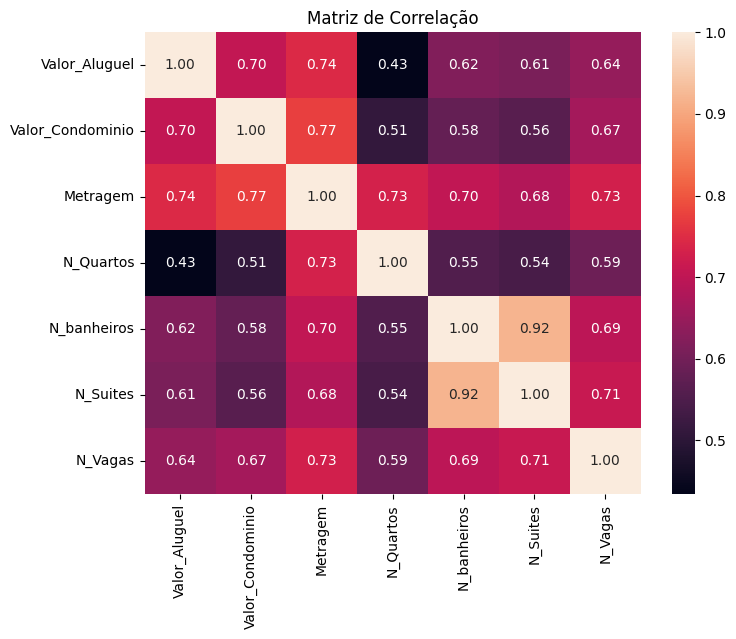

In [13]:
#criar grafico heartmap para ver correlacao entre variaveis
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Matriz de Correlação')

podemos ver uma forte correlação entre valor de alugel e todos os demais campos exeto o numero de quartos que tem uma co relação "baixa" em relação as demais , as com maiores co-relaçoes são a de metragem , valor de condominio, apesar da co relação entre numero de banheiro e suites ser muito proxima podemos ver que elas mais se relscionam entre si do que com a variavel alvo


B) Durante a aula, por nossa base ser pequena e demonstrativa não realizamos a separação de treino e teste, porém para as atividades do dia dia temos que fazer, nesse exercício separe treino e teste.

Lembre-se que primeiro separamos as variaveis dependentes X e depois Y, essa etapa deixarei para vocês abaixo:

In [14]:

X = df[['Metragem']] #Separando X - Todas variáveis exceto valor_aluguel
y = df['Valor_Aluguel'] #Separando Y (Apenas variável valor_aluguel)

Dica: Para separar em treino e teste usamos o train_test_split, como visto nas aulas de pré modelagem.

In [15]:
# Separar base de train test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
#criar um smote




print("Shape of training features:", X_train.shape)
print("Shape of training target:", y_train.shape)


Shape of training features: (5762, 1)
Shape of training target: (5762,)


# 3 - Treine um modelo de regressão Linear simples

A) Vamos utilizar apenas X_train e y_train para rodar um modelo de regressão linea simples e para isso usaremos apenas uma váriavel, a váriavel metragem.

In [17]:
X = X_train # Variável independente (características)
y = y_train  # Variável dependente (rótulo)
# se você deu um nome diferente para x train e y train, altere no código.

In [18]:
#Crie seu modelo aqui, usando LinearRegression e as bases de treino.
model = LinearRegression()
model.fit(X, y)

LinearRegression()

B) Plote o intercept_ e coef_ e monte de forma extensa a equação da reta.

In [19]:
model.intercept_

np.float64(216.60861311679537)

In [20]:
model.coef_

array([28.35595889])

Nossa equação seria:  

c) Calcule o R² para o modelo de treinamento. Não esqueça de avaliar e trazer em formato de insight se esse resultado te parece bom ou não.

In [21]:
model.score(X,y)

0.5509201596682427

D) Plote o gráfico da reta de regressão encontrada e traga insights acerca da dispersão dos pontos e ajuste da reta.

In [22]:
fig = px.scatter(x=X['Metragem'], y=y, title='Relação entre Metragem e Valor do Aluguel', trendline='ols')
fig.show()

Existe uma tendência de aumento do valor do aluguel conforme a metragem cresce, mas a relação é fraca — indicando que o preço depende de outros fatores além do tamanho. Há uma faixa dominante de imóveis médios com preços entre R$ 1.000 e R$ 3.000, e um teto aparente em R$ 6.000

E) Para finalizar vamos aplicar o modelo a base de teste. Essa etapa é nova, então agora vocês avaliaram como o modelo treinado se saiu com a base de testes.
Para isso altere no código abaixo o nome do seu modelo de regressão:

In [23]:
X_test = X_test[['Metragem']]  # Variável independente (características)
y_test = y_test  # Variável dependente (rótulo)

In [24]:
# Usando o modelo treinado para fazer previsões sobre os dados de teste
previsoes = model.predict(X_test)


previsoes


array([1634.40655743, 1634.40655743, 1861.25422852, ..., 4498.35840494,
       2598.50915956, 2286.59361181], shape=(1441,))

In [25]:
y_test

3885    2100.0
4661    2500.0
1038    1200.0
5867    4000.0
5099    3000.0
         ...  
1882    1400.0
911     1100.0
6522    5975.0
3484    1900.0
6657    5975.0
Name: Valor_Aluguel, Length: 1441, dtype: float64

In [26]:
r2 = model.score(X_test, y_test)
r2

0.5702561411987597

Se o valor do coeficiente de determinação (R²) para os dados de treinamento for melhor (ou seja, mais próximo de 1) do que o R² para os dados de teste, isso sugere que o modelo está superajustado aos dados de treinamento. Isso significa que o modelo pode estar se ajustando muito bem aos padrões específicos nos dados de treinamento, mas pode não generalizar bem para novos dados que não foram vistos durante o treinamento.

Por outro lado, se o R² para os dados de teste for melhor do que o R² para os dados de treinamento, isso pode ser indicativo de que o modelo está subajustado. Isso significa que o modelo não está se ajustando adequadamente aos padrões nos dados de treinamento e não está capturando a relação entre as variáveis independentes e dependentes de forma eficaz.

Idealmente, gostaríamos que o valor do R² fosse consistente entre os dados de treinamento e teste, indicando que o modelo é capaz de generalizar bem para novos dados. Se houver uma grande diferença entre os valores de R² para os dados de treinamento e teste, isso sugere que o modelo pode precisar de ajustes para melhorar sua capacidade de generalização.

F) Avalie com suas palavras o valor do r quadrado encontrado no treino e no teste.

O modelo alcançou um R² de 57% no teste e 55% no treino.Isso significa que ele explica 57% da variação em dados novos, mostrando boa capacidade de generalização e que aprendeu padrões relevantes.O fato de o R² do teste ser maior que o do treino é um excelente indicativo: o modelo não está superajustado (overfitted).Pelo contrário, há uma sugestão de subajuste (underfitting), o que nos dá margem para melhorar o aprendizado nos dados de treinamento estou ancioso para ver na regreção multipla.

# 4 - Aplicação do modelo de regressão linear multipla!

A) Vamos refazer os passos anteriores porém para regressão multipla, com todas variáveis dependentes. Comece separando a base treino e teste, dessa vez com todas variáveis para X.

Aqui é só refazer os passos do exercicio 3 porém ao invés de trazer para X apenas metragem, você deve trazer todas colunas (exceto a valor do aluguel).

In [42]:
X = df.drop(columns=['Valor_Aluguel']) #Separando X - Todas variáveis exceto valor_aluguel
y = df['Valor_Aluguel'] #Separando Y (Apenas variável valor_aluguel)

In [43]:
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X, y, test_size=0.2, random_state=42)

B) Faça o modelo de regressão linear multipla aplicado só a base de treino.

In [44]:
X = X_train_multi
y = y_train_multi

In [45]:
model.fit(X, y)

LinearRegression()

C) Traga o valor do R quadrado e avalie o valor encontrado.

In [46]:
model.score(X, y)

0.6385128950699257

D) Para finalizar aplique o modelo a base de teste e traga o r quadrado de teste.
Dica: Você pode usar os códigos do exercício anterior.

In [47]:
previsoes = model.predict(X_test_multi)
previsoes

array([1481.51528588, 1624.36720456, 1541.72959239, ..., 4366.13945161,
       2208.00140365, 3467.2938401 ], shape=(1441,))

In [48]:
r2 = model.score(X_test_multi, y_test_multi)
r2

0.6485731750501595

E) Compare os r quadrados encontrados pela regressão linear e pela regressão múltipla. Qual modelo te parece melhor? Por qual motivo acredita que isso ocorreu?

o modelo de regreção multipla foi melhor eu acredito que é porque tem mais variaveis independenntes que tem alta correlação com a variavel dependente como tem mais dessas variaves fica mais facil para o modelo identificar padroes ,É como tentar distinguir entre meninos e meninas:
se usarmos apenas o cabelo como referência, o acerto será limitado já que tanto menino pode ter cabelo grande quanto meninas cabelos curtos;
mas se incluirmos outras características, como altura, roupas, sapatos e acessórios podemos prever com mais exatidão se trata de um menino ou uma menina com base em caracteristicas já que a regressão simples tenta prever o resultado com poucas pistas,
enquanto a regressão múltipla usa mais pistas relevantes, tornando o palpite mais inteligente e fundamentado.